# Assignment 1C - Question 1
## Clustering and Recommendations

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from matplotlib import cm
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [2]:
links = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q1/links.csv')
movies_metadata = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q1/movies.csv')
ratings = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q1/ratings.csv')
tags = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q1/tags.csv')

In [3]:
movies_metadata.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [4]:
print(movies_metadata)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

### Filter ratings for 4+

In [5]:
print(ratings)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [6]:
ratings_4 = ratings[ratings['rating'] >= 4.0]

In [7]:
movies_list = np.unique(ratings['movieId'])[:200]
ratings = ratings.loc[ratings['movieId'].isin(movies_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n') 

Shape of ratings dataset is:  (6351, 4) 

Max values in dataset are 
 userId       6.100000e+02
movieId      2.330000e+02
rating       5.000000e+00
timestamp    1.537799e+09
dtype: float64 

Min values in dataset are 
 userId               1.0
movieId              1.0
rating               0.5
timestamp    828124615.0
dtype: float64 



In [8]:
users_list = np.unique(ratings['userId'])[:100]
ratings = ratings.loc[ratings['userId'].isin(users_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')
print('Total Users: ', np.unique(ratings['userId']).shape[0])
print('Total Movies which are rated by 100 users: ', np.unique(ratings['movieId']).shape[0])

Shape of ratings dataset is:  (1208, 4) 

Max values in dataset are 
 userId       1.070000e+02
movieId      2.330000e+02
rating       5.000000e+00
timestamp    1.535470e+09
dtype: float64 

Min values in dataset are 
 userId               1.0
movieId              1.0
rating               0.5
timestamp    829322340.0
dtype: float64 

Total Users:  100
Total Movies which are rated by 100 users:  160


In [9]:
users_fav_movies = ratings.loc[:, ['userId', 'movieId']]

In [10]:
users_fav_movies = ratings.reset_index(drop = True)

In [11]:
users_fav_movies.T

,0,1,2,3,4,5,6,7,8,9,...,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207
userId,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
movieId,1.0,3.0,6.0,47.0,50.0,70.0,101.0,110.0,151.0,157.0,...,140.0,141.0,150.0,153.0,160.0,161.0,165.0,185.0,208.0,231.0
rating,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,4.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0
timestamp,964982703.0,964981247.0,964982224.0,964983815.0,964982931.0,964982400.0,964980868.0,964982176.0,964984041.0,964984100.0,...,829322340.0,829322340.0,832003609.0,832003644.0,832003891.0,832003700.0,832003678.0,832003754.0,832003755.0,832003701.0


In [12]:
def moviesListForUsers(users, users_data):
    # users = a list of users IDs
    # users_data = a dataframe of users favourite movies or users watched movies
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['userId'] == user]['movieId'])).split('[')[1].split(']')[0])
    return users_movies_list

In [13]:
users = np.unique(users_fav_movies['userId'])
print(users.shape) 

(100,)


In [14]:
users_movies_list = moviesListForUsers(users, users_fav_movies)
print('Movies list for', len(users_movies_list), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list[:10])

Movies list for 100  users
A list of first 10 users favourite movies: 
 ['1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231', '31', '21, 32, 45, 47, 52, 58, 106, 125, 126, 162, 171, 176, 190, 215, 222, 232', '1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232', '2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 31, 32, 34, 36, 41, 43, 45, 46, 47, 50, 54, 60, 61, 62, 65, 66, 76, 79, 86, 87, 88, 89, 92, 93, 95, 100, 102, 104, 105, 110, 112, 113, 126, 135, 140, 141, 145, 146, 150, 151, 153, 158, 159, 160, 161, 163, 165, 168, 170, 171, 174, 177, 179, 180, 181, 185, 186, 189, 191, 195, 196, 201, 204, 205, 207, 208, 209, 210, 212, 216, 217, 218, 219, 222, 224, 225, 230, 231', '1, 50, 58, 150, 165', '2, 10, 11, 21, 32, 34, 39, 47, 50, 110, 141, 150, 153, 185, 186, 208, 231', '41, 187, 223', '6, 10, 36, 44, 95, 110, 150, 153, 165, 170, 208', '39, 168, 222']


In [15]:
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [16]:
sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

In [17]:
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

,1,10,100,101,102,104,105,106,107,11,...,82,85,86,87,88,89,92,93,94,95
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,1,0,1,1,1,0,0,1,...,0,0,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
104,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
first_6_users_SM = users_fav_movies[users_fav_movies['userId'].isin(users[:6])].sort_values('userId')
first_6_users_SM.T

,0,13,12,10,9,8,7,11,5,4,...,70,69,68,67,77,143,140,141,142,144
userId,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
movieId,1.0,231.0,223.0,163.0,157.0,151.0,110.0,216.0,70.0,50.0,...,47.0,46.0,45.0,43.0,66.0,1.500000e+02,1.000000e+00,5.000000e+01,5.800000e+01,1.650000e+02
rating,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,4.0,4.0,3.0,4.0,3.0,4.500000e+00,4.500000e+00,4.500000e+00,3.000000e+00,4.000000e+00
timestamp,964982703.0,964981179.0,964980985.0,964983650.0,964984100.0,964984041.0,964982176.0,964981208.0,964982400.0,964982931.0,...,845553317.0,845554551.0,845553907.0,845555607.0,845555151.0,1.106636e+09,1.106636e+09,1.106636e+09,1.106636e+09,1.106636e+09


In [19]:
df_sparseMatrix.loc[np.unique(first_6_users_SM['userId']), list(map(str, np.unique(first_6_users_SM['movieId'])))]

,1,2,3,4,5,6,7,8,10,11,...,217,218,219,222,223,224,225,230,231,232
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

In [21]:
elbow_method = elbowMethod(sparseMatrix) 

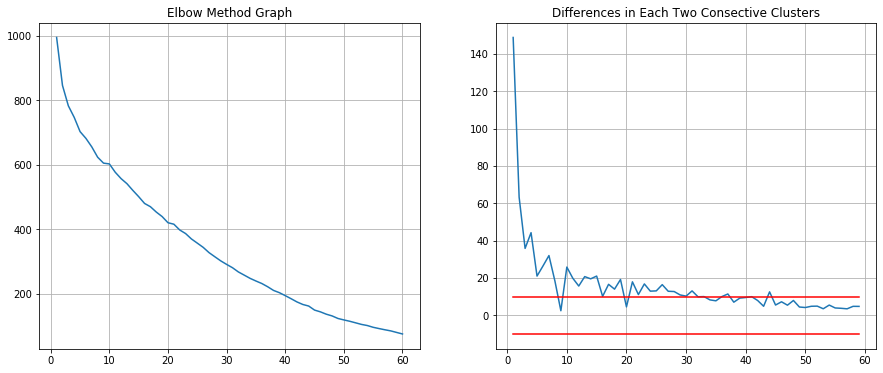

In [22]:
elbow_method.run(1, 60)
elbow_method.showPlot(boundary = 10)

In [23]:
kmeans = KMeans(n_clusters=42, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

In [24]:
users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['userId', 'Cluster'])
users_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
userId,1,3,4,5,6,7,8,9,11,12,...,96,98,99,100,101,102,103,104,105,107
Cluster,37,0,21,4,6,11,15,0,1,0,...,4,11,27,33,0,26,14,32,16,19


In [25]:
def clustersMovies(users_cluster, users_data):
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['userId'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['userId'] == user]['movieId']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['movieId', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies
cluster_movies = clustersMovies(users_cluster, users_fav_movies)

In [26]:
cluster_movies[1].T

,0,1,2,3,4,5,6,7,8,9,10
movieId,6,10,36,44,95,110,150,153,165,170,208
Count,1,1,1,1,1,1,1,1,1,1,1


In [27]:
for i in range(42):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users) 

Users in Cluster 0 ->  24
Users in Cluster 1 ->  1
Users in Cluster 2 ->  1
Users in Cluster 3 ->  1
Users in Cluster 4 ->  4
Users in Cluster 5 ->  1
Users in Cluster 6 ->  1
Users in Cluster 7 ->  2
Users in Cluster 8 ->  1
Users in Cluster 9 ->  1
Users in Cluster 10 ->  1
Users in Cluster 11 ->  13
Users in Cluster 12 ->  1
Users in Cluster 13 ->  1
Users in Cluster 14 ->  1
Users in Cluster 15 ->  2
Users in Cluster 16 ->  10
Users in Cluster 17 ->  1
Users in Cluster 18 ->  1
Users in Cluster 19 ->  1
Users in Cluster 20 ->  1
Users in Cluster 21 ->  1
Users in Cluster 22 ->  1
Users in Cluster 23 ->  1
Users in Cluster 24 ->  1
Users in Cluster 25 ->  1
Users in Cluster 26 ->  1
Users in Cluster 27 ->  1
Users in Cluster 28 ->  1
Users in Cluster 29 ->  1
Users in Cluster 30 ->  3
Users in Cluster 31 ->  1
Users in Cluster 32 ->  7
Users in Cluster 33 ->  1
Users in Cluster 34 ->  1
Users in Cluster 35 ->  1
Users in Cluster 36 ->  1
Users in Cluster 37 ->  1
Users in Cluster 38

In [28]:
def getMoviesOfUser(user_id, users_data):
    return list(users_data[users_data['userId'] == user_id]['movieId'])

In [29]:
def fixClusters(clusters_movies_dataframes, users_cluster_dataframe, users_data, smallest_cluster_size = 11):
    # clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
    # users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
    # smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove
    each_cluster_movies = clusters_movies_dataframes.copy()
    users_cluster = users_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_movies_list = [list(df['movieId']) for df in each_cluster_movies]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    usersInClusters = list()
    total_clusters = len(each_cluster_movies)
    for i in range(total_clusters):
        usersInClusters.append(list(users_cluster[users_cluster['Cluster'] == i]['userId']))
    uncategorizedUsers = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(usersInClusters[i]) < smallest_cluster_size:
            uncategorizedUsers.extend(usersInClusters[i])
            usersInClusters.pop(i)
            each_cluster_movies.pop(i)
            each_cluster_movies_list.pop(i)
            users_cluster.loc[users_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for user in uncategorizedUsers:
        elemProbability = list()
        user_movies = getMoviesOfUser(user, users_data)
        if len(user_movies) == 0:
            print(user)
        user_missed_movies = list()
        for movies_list in each_cluster_movies_list:
            count = 0
            missed_movies = list()
            for movie in user_movies:
                if movie in movies_list:
                    count += 1
                else:
                    missed_movies.append(movie)
            elemProbability.append(count / len(user_movies))
            user_missed_movies.append(missed_movies)
        user_new_cluster = np.array(elemProbability).argmax()
        users_cluster.loc[users_cluster['userId'] == user, 'Cluster'] = user_new_cluster
        if len(user_missed_movies[user_new_cluster]) > 0:
            each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
    return each_cluster_movies, users_cluster 

In [30]:
movies_df_fixed, clusters_fixed = fixClusters(cluster_movies, users_cluster, users_fav_movies, smallest_cluster_size = 6)

In [31]:
j = 0
for i in range(15):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    if len_users < 6:
        print('Users in Cluster ' + str(i) + ' -> ', len_users)
        j += 1
print('Total Cluster which we want to remove -> ', j) 

Users in Cluster 1 ->  1
Users in Cluster 2 ->  1
Users in Cluster 3 ->  1
Users in Cluster 4 ->  4
Users in Cluster 5 ->  1
Users in Cluster 6 ->  1
Users in Cluster 7 ->  2
Users in Cluster 8 ->  1
Users in Cluster 9 ->  1
Users in Cluster 10 ->  1
Users in Cluster 12 ->  1
Users in Cluster 13 ->  1
Users in Cluster 14 ->  1
Total Cluster which we want to remove ->  13


In [32]:
print('Length of total clusters before fixing is -> ', len(cluster_movies))
print('Max value in users_cluster dataframe column Cluster is -> ', users_cluster['Cluster'].max())
print('And dataframe is following')
users_cluster.T 

Length of total clusters before fixing is ->  42
Max value in users_cluster dataframe column Cluster is ->  41
And dataframe is following


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
userId,1,3,4,5,6,7,8,9,11,12,...,96,98,99,100,101,102,103,104,105,107
Cluster,37,0,21,4,6,11,15,0,1,0,...,4,11,27,33,0,26,14,32,16,19


In [33]:
print('Length of total clusters after fixing is -> ', len(movies_df_fixed))
print('Max value in users_cluster dataframe column Cluster is -> ', clusters_fixed['Cluster'].max())
print('And fixed dataframe is following')
clusters_fixed.T 

Length of total clusters after fixing is ->  4
Max value in users_cluster dataframe column Cluster is ->  3
And fixed dataframe is following


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
userId,1,3,4,5,6,7,8,9,11,12,...,96,98,99,100,101,102,103,104,105,107
Cluster,0,0,2,1,1,1,1,0,1,0,...,1,1,1,0,0,0,0,3,2,1


In [34]:
print('Users cluster dataFrame for cluster 11 before fixing:')
users_cluster[users_cluster['Cluster'] == 11].T 

Users cluster dataFrame for cluster 11 before fixing:


,5,12,24,26,34,41,47,68,71,72,80,83,91
userId,7,15,27,29,37,44,50,73,76,78,86,89,98
Cluster,11,11,11,11,11,11,11,11,11,11,11,11,11


In [35]:
print('Users cluster dataFrame for cluster 4 after fixing which should be same as 11th cluster before fixing:')
clusters_fixed[clusters_fixed['Cluster'] == 4].T 

Users cluster dataFrame for cluster 4 after fixing which should be same as 11th cluster before fixing:


""
userId
Cluster


In [36]:
for i in range(len(movies_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users) 

Users in Cluster 0 ->  39
Users in Cluster 1 ->  41
Users in Cluster 2 ->  13
Users in Cluster 3 ->  7


In [37]:
class saveLoadFiles:
    def save(self, filename, data):
        try:
            file = open('CAB420_Assessment_1C_Data/Data/' + filename + '.pkl', 'wb')
            pickle.dump(data, file)
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            file.close()
            return [True]
    def load(self, filename):
        try:
            file = open('CAB420_Assessment_1C_Data/Data/' + filename + '.pkl', 'rb')
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            data = pickle.load(file)
            file.close()
            return data
    def loadClusterMoviesDataset(self):
        return self.load('clusters_movies_dataset')
    def saveClusterMoviesDataset(self, data):
        return self.save('clusters_movies_dataset', data)
    def loadUsersClusters(self):
        return self.load('users_clusters')
    def saveUsersClusters(self, data):
        return self.save('users_clusters', data)

In [38]:
saveLoadFile = saveLoadFiles()
print(saveLoadFile.saveClusterMoviesDataset(movies_df_fixed))
print(saveLoadFile.saveUsersClusters(clusters_fixed)) 

[True]
[True]


In [43]:
load_movies_list, load_users_clusters = saveLoadFile.loadClusterMoviesDataset(), saveLoadFile.loadUsersClusters()
print('Type of Loading list of Movies dataframes of 5 Clusters: ', type(load_movies_list), ' and Length is: ', len(load_movies_list))
print('Type of Loading 100 Users clusters Data: ', type(load_users_clusters), ' and Shape is: ', load_users_clusters.shape) 

Type of Loading list of Movies dataframes of 5 Clusters:  <class 'list'>  and Length is:  4
Type of Loading 100 Users clusters Data:  <class 'pandas.core.frame.DataFrame'>  and Shape is:  (100, 2)


In [39]:
class userRequestedFor:
    def __init__(self, user_id, users_data):
        self.users_data = users_data.copy()
        self.user_id = user_id
        # Find User Cluster
        users_cluster = saveLoadFiles().loadUsersClusters()
        self.user_cluster = int(users_cluster[users_cluster['userId'] == self.user_id]['Cluster'])
        # Load User Cluster Movies Dataframe
        self.movies_list = saveLoadFiles().loadClusterMoviesDataset()
        self.cluster_movies = self.movies_list[self.user_cluster] # dataframe
        self.cluster_movies_list = list(self.cluster_movies['movieId']) # list
    def updatedFavouriteMoviesList(self, new_movie_Id):
        if new_movie_Id in self.cluster_movies_list:
            self.cluster_movies.loc[self.cluster_movies['movieId'] == new_movie_Id, 'Count'] += 1
        else:
            self.cluster_movies = self.cluster_movies.append([{'movieId':new_movie_Id, 'Count': 1}], ignore_index=True)
        self.cluster_movies.sort_values(by = ['Count'], ascending = False, inplace= True)
        self.movies_list[self.user_cluster] = self.cluster_movies
        saveLoadFiles().saveClusterMoviesDataset(self.movies_list)

    def recommendMostFavouriteMovies(self):
        try:
            user_movies = getMoviesOfUser(self.user_id, self.users_data)
            cluster_movies_list = self.cluster_movies_list.copy()
            for user_movie in user_movies:
                if user_movie in cluster_movies_list:
                    cluster_movies_list.remove(user_movie)
            return [True, cluster_movies_list]
        except KeyError:
            err = "User history does not exist"
            print(err)
            return [False, err]
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            return [False, err]

In [44]:


movies_metadata = movies_metadata.loc[
    movies_metadata['movieId'].isin(list(map(str, np.unique(users_fav_movies['movieId']))))].reset_index(drop=True)
print('Let take a look at movie metadata for all those movies which we were had in our dataset')
movies_metadata 

Let take a look at movie metadata for all those movies which we were had in our dataset


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
155,228,Destiny Turns on the Radio (1995),Comedy
156,230,Dolores Claiborne (1995),Drama|Thriller
157,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
158,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance


In [47]:
user12Movies = getMoviesOfUser(12, users_fav_movies)
for movie in user12Movies:
    title = list(movies_metadata.loc[movies_metadata['movieId'] == str(movie)]['title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['movieId'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
            print(genre['name'], ', ', end = '')
        print(end = '\b\b]')
        print('') 

C:\Users\callm\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [46]:
user12Recommendations = userRequestedFor(12, users_fav_movies).recommendMostFavouriteMovies()[1]
for movie in user12Recommendations[:15]:
    title = list(movies_metadata.loc[movies_metadata['movieId'] == str(movie)]['title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['id'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
            print(genre['name'], ', ', end = '')
        print(']', end = '')
        print() 